# Projet Datapolitics  | Datapolitics project

L'objet du projet est de réaliser un détecteur de "projets" mis en œuvre par les collectivités territoriales à partir
des documents qu'elles produisent. | The goal of the project is to develop a detector of "projects" implemented by territorial communities from the documents they produce.

On se concentre ici sur la géothermie. | Here, we focus on geothermal projects.

In [20]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install bs4
%pip install scikit-learn
%pip install requests

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [1]:
import re
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from bs4 import BeautifulSoup
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.multiclass import OneVsRestClassifier


In [22]:
# # Load the dataset
# df = pd.read_csv('dataset.csv')

# # Load a random subset of the dataset for development
# # TODO: Load the entire dataset
# df = df.sample(2000)


# def extract_text(url):
#     response = requests.get(url)
#     soup = BeautifulSoup(response.text, 'html.parser')
#     text = soup.get_text()
#     text = re.sub(r'\s+', ' ', text).strip()
#     return text

# df['extracted_text'] = df['fulltext'].apply(extract_text)

/usr/local/Cellar/python@3.12/3.12.4/Frameworks/Python.framework/Versions/3.12/lib/python3.12/html/parser.py:171: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  k = self.parse_starttag(i)


In [23]:
# print(df['extracted_text'].head(10))

12926    n°169 La mairie vous informe ➔Tirage au sort j...
19186    Conseil municipal du 4 avril 2024 Compte-rendu...
16539    Commune de Rieux Conseil Municipal du 21 mars ...
11675    AccessDeniedAccess Denied.tx7f434c928134454b81...
476      VILLE DU BLANC-MESNIL Rapport d’orientation bu...
18609    Commune de Genouillé Procès-verbal de la séanc...
3419     Diagnostic de performance énergétique (logemen...
17239    AccessDeniedAccess Denied.tx7b241d9f96604a95bb...
9457     Département des Yvelines PLAN LOCAL D’URBANISM...
11315    FABRèGUES INFOS Novembre - Décembre 2023 Numér...
Name: extracted_text, dtype: object


In [2]:
# Loading the entire dataset
df = pd.read_csv('dataset_full_texts.csv')

In [8]:
df.columns

Index(['doc_id', 'url', 'cache', 'fulltext', 'nature', 'published',
       'entity_name', 'entity_type', 'geo_path', 'extracted_text'],
      dtype='object')

In [9]:
# checking the entire dataset has the full text

df[df["extracted_text"].isna()]

,doc_id,url,cache,fulltext,nature,published,entity_name,entity_type,geo_path,extracted_text


In [12]:
df["extracted_text"].iloc[-1]

"20244 République Française Département de l’Oise Mairie d’Erquery CONSEIL MUNICIPAL Séance du 04 juillet 2024 Le quatre juillet deux mil vingt-quatre à dix-neuf heures, le Conseil Municipal, régulièrement convoqué, s’est réuni au nombre prescrit par la loi, dans le lieu habituel de ses séances, sous la présidence de Monsieur Stéphane LECOMTE, Maire. Présents : Mesdames Christine GHAZALI, Céline GIRARD, Valérie BERENGER Messieurs Stéphane LECOMTE, Sylvain COLLIN, Julien ERARD, Patrick DUHIN, Guillaume DRUON. Absents excusés : Mesdames Aline VANDEWALLE, Sabine GARNET, Hélène HENRY Messieurs Dominique BRACHET, Ali BARREDDINE, Philippe HENRY. Pouvoir : Madame Aline VANDEWALLE donne pouvoir à Madame Christine GHAZALI, Madame Sabine GARNET donne pouvoir à Monsieur Guillaume DRUON, Madame Hélène HENRY donne pouvoir à Madame Valérie BERENGER, Monsieur Dominique BRACHET donne pouvoir à Monsieur Stéphane LECOMTE, Monsieur Ali BARREDDINE donne pouvoir à Madame Céline GIRARD, Monsieur Philippe HE

In [24]:

# Create a binary label
df['is_geothermal'] = df['extracted_text'].apply(lambda x: 1 if 'géothermie' in x.lower() else 0)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(df['extracted_text'], df['is_geothermal'], test_size=0.2)

# Vectorize the text
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train a simple classifier
clf = MultinomialNB()
clf.fit(X_train_vec, y_train)

# Evaluate
y_pred = clf.predict(X_test_vec)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.93      1.00      0.97       373

    accuracy                           0.93       400
   macro avg       0.47      0.50      0.48       400
weighted avg       0.87      0.93      0.90       400



/Users/tunji/.local/share/virtualenvs/council-minutes-1mY8XzjE/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/tunji/.local/share/virtualenvs/council-minutes-1mY8XzjE/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/tunji/.local/share/virtualenvs/council-minutes-1mY8XzjE/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` pa

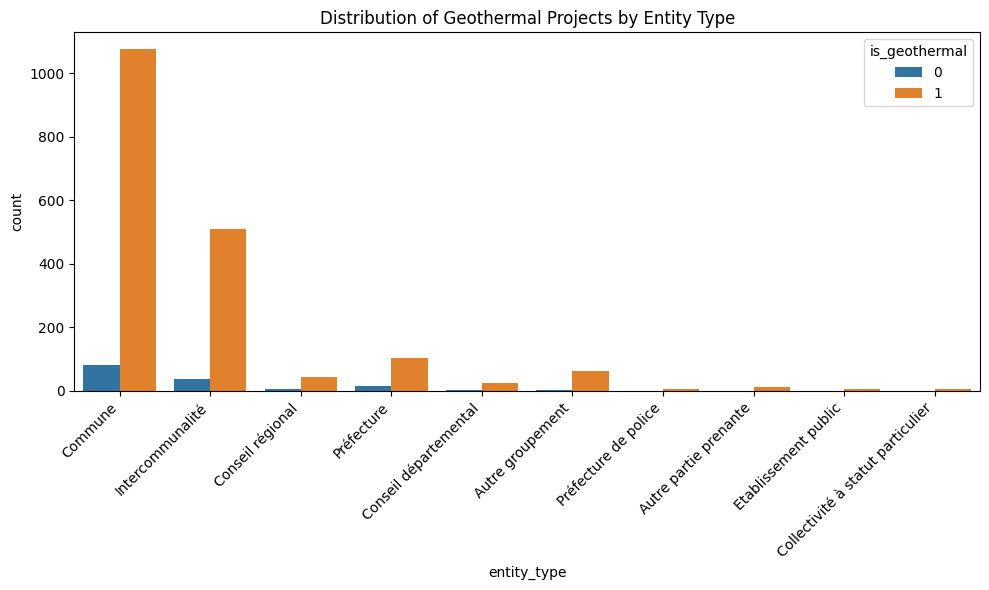

In [29]:
# Visualize the distribution of the binary label
plt.figure(figsize=(10, 6))
sns.countplot(x='entity_type', hue='is_geothermal', data=df)
plt.title('Distribution of Geothermal Projects by Entity Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [30]:

# Multi-class Classification

# - idée/souhait,
# - études préalables,
# - budget voté pour le projet définitif,
# - réalisation en cours,
# - installation terminée

def get_project_stage(text):
    # TODO: What are the criteria to determine the project stage?
    pass

# df['project_stage'] = df[df['is_geothermal'] == 1]['extracted_text'].apply(get_project_stage)

# TODO: Train a multi-class classifier
# multi_clf = OneVsRestClassifier(MultinomialNB())
# Implement training and evaluation

In [31]:

# Data Extraction
# - budget initial
# - coût final
# - durée estimée
# - durée effective

# TODO: Will regex work? or do we need to use OCR?
# Found this model seems to be a good candidate incase we need OCR
# https://huggingface.co/spaces/stepfun-ai/GOT_official_online_demo

def extract_budget(text):
    pass

def extract_estimated_duration(text):
    pass

def extract_final_cost(text):
    pass

def extract_effective_duration(text):
    pass

# df['initial_budget'] = df['extracted_text'].apply(extract_budget)


In [ ]:

# Results Analysis and Visualization